<p align="right">
    <img src="Zewail-City.png">
</p>


---

# __Final__


In [2]:
# Main Libraries
from astroquery.gaia import Gaia
from astropy.table import Table, Column
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load table
Gaia.load_table("gaiadr3.gaia_source")

In [4]:
# Query
query = """
SELECT TOP 10
    gaia.source_id, 
    gaia.ra,
    gaia.ra_error,
    gaia.dec,
    gaia.dec_error,
    gaia.parallax,
    gaia.parallax_error,
    gaia.pmra, 
    gaia.pmra_error, 
    gaia.pmdec,
    gaia.pmdec_error
FROM gaiadr3.gaia_source AS gaia
WHERE
    gaia.ra IS NOT NULL
    AND gaia.dec IS NOT NULL
    AND gaia.pmra IS NOT NULL
    AND gaia.pmdec IS NOT NULL
    AND gaia.parallax > 0;
"""

In [5]:
# Finally
results = Gaia.launch_job_async(query).get_results()
# Display results
results[0:]

INFO: Query finished. [astroquery.utils.tap.core]


source_id,ra,ra_error,dec,dec_error,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error
,deg,mas,deg,mas,mas,mas,mas / yr,mas / yr,mas / yr,mas / yr
int64,float64,float32,float64,float32,float64,float32,float64,float32,float64,float32
2202722223125348992,328.48637057266,1.7320381,59.4421245479669,1.1843996,0.6864729399943725,1.3913763,-1.4079808299737873,2.6874862,-2.0350991675452055,1.8725736
2202722223125349504,328.49093154912373,0.99948007,59.4334647675105,1.0735259,0.1024265452885614,1.2957705,-1.8885133472649547,1.3297032,-1.5864056780180316,1.7261807
2202722223127400960,328.5048049087042,1.0706778,59.44087132344967,0.96606356,1.1494324505474813,1.1716287,-8.334292077078528,2.0005472,-0.2700348331061333,1.5588146
2202722223136348416,328.49063369104533,0.15612613,59.44628535008396,0.13968398,0.5092686313817985,0.16751221,-1.8123847178857713,0.23966849,-1.397245813950195,0.19688936
2202722223136350208,328.49568783502974,0.03581552,59.437558450671055,0.03558392,0.46010178105104305,0.039713997,-7.106021544039397,0.05194358,-5.953335558745591,0.04760808
2202722223139410560,328.5017738129396,0.20122463,59.45172041356036,0.16026242,0.35931897650001965,0.18913889,-4.853579026110831,0.24282229,-2.400693469419974,0.19512233
2202722253187386624,328.51636887064615,0.22774152,59.44347178462877,0.2145681,0.39381574389319146,0.248306,-1.7321949103029852,0.3282539,0.6100101776326166,0.29498202
2202722253187413248,328.5126576221962,0.096601434,59.449503303652186,0.089859664,0.1044143425674698,0.10731728,-3.7030874141851413,0.14320302,-3.619098839919097,0.120518625


In [6]:
# Compute distance and distance_error
distance = 1.0 / results['parallax']
distance_error = 1.0 / results['parallax_error']

# Add the new columns
results.add_column(Column(distance, name='distance'))
results.add_column(Column(distance_error, name='distance_error'))

In [7]:
# Display results
results[0:]

source_id,ra,ra_error,dec,dec_error,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,distance,distance_error
,deg,mas,deg,mas,mas,mas,mas / yr,mas / yr,mas / yr,mas / yr,,
int64,float64,float32,float64,float32,float64,float32,float64,float32,float64,float32,float64,float32
2202722223125348992,328.48637057266,1.7320381,59.4421245479669,1.1843996,0.6864729399943725,1.3913763,-1.4079808299737873,2.6874862,-2.0350991675452055,1.8725736,1.4567216589894973,0.71871287
2202722223125349504,328.49093154912373,0.99948007,59.4334647675105,1.0735259,0.1024265452885614,1.2957705,-1.8885133472649547,1.3297032,-1.5864056780180316,1.7261807,9.763094100096296,0.77174157
2202722223127400960,328.5048049087042,1.0706778,59.44087132344967,0.96606356,1.1494324505474813,1.1716287,-8.334292077078528,2.0005472,-0.2700348331061333,1.5588146,0.8699945782143998,0.8535127
2202722223136348416,328.49063369104533,0.15612613,59.44628535008396,0.13968398,0.5092686313817985,0.16751221,-1.8123847178857713,0.23966849,-1.397245813950195,0.19688936,1.9636002266361865,5.969714
2202722223136350208,328.49568783502974,0.03581552,59.437558450671055,0.03558392,0.46010178105104305,0.039713997,-7.106021544039397,0.05194358,-5.953335558745591,0.04760808,2.1734321430263304,25.180038
2202722223139410560,328.5017738129396,0.20122463,59.45172041356036,0.16026242,0.35931897650001965,0.18913889,-4.853579026110831,0.24282229,-2.400693469419974,0.19512233,2.7830425482689343,5.28712
2202722253187386624,328.51636887064615,0.22774152,59.44347178462877,0.2145681,0.39381574389319146,0.248306,-1.7321949103029852,0.3282539,0.6100101776326166,0.29498202,2.5392585631904407,4.027289
2202722253187413248,328.5126576221962,0.096601434,59.449503303652186,0.089859664,0.1044143425674698,0.10731728,-3.7030874141851413,0.14320302,-3.619098839919097,0.120518625,9.577228332916297,9.318164


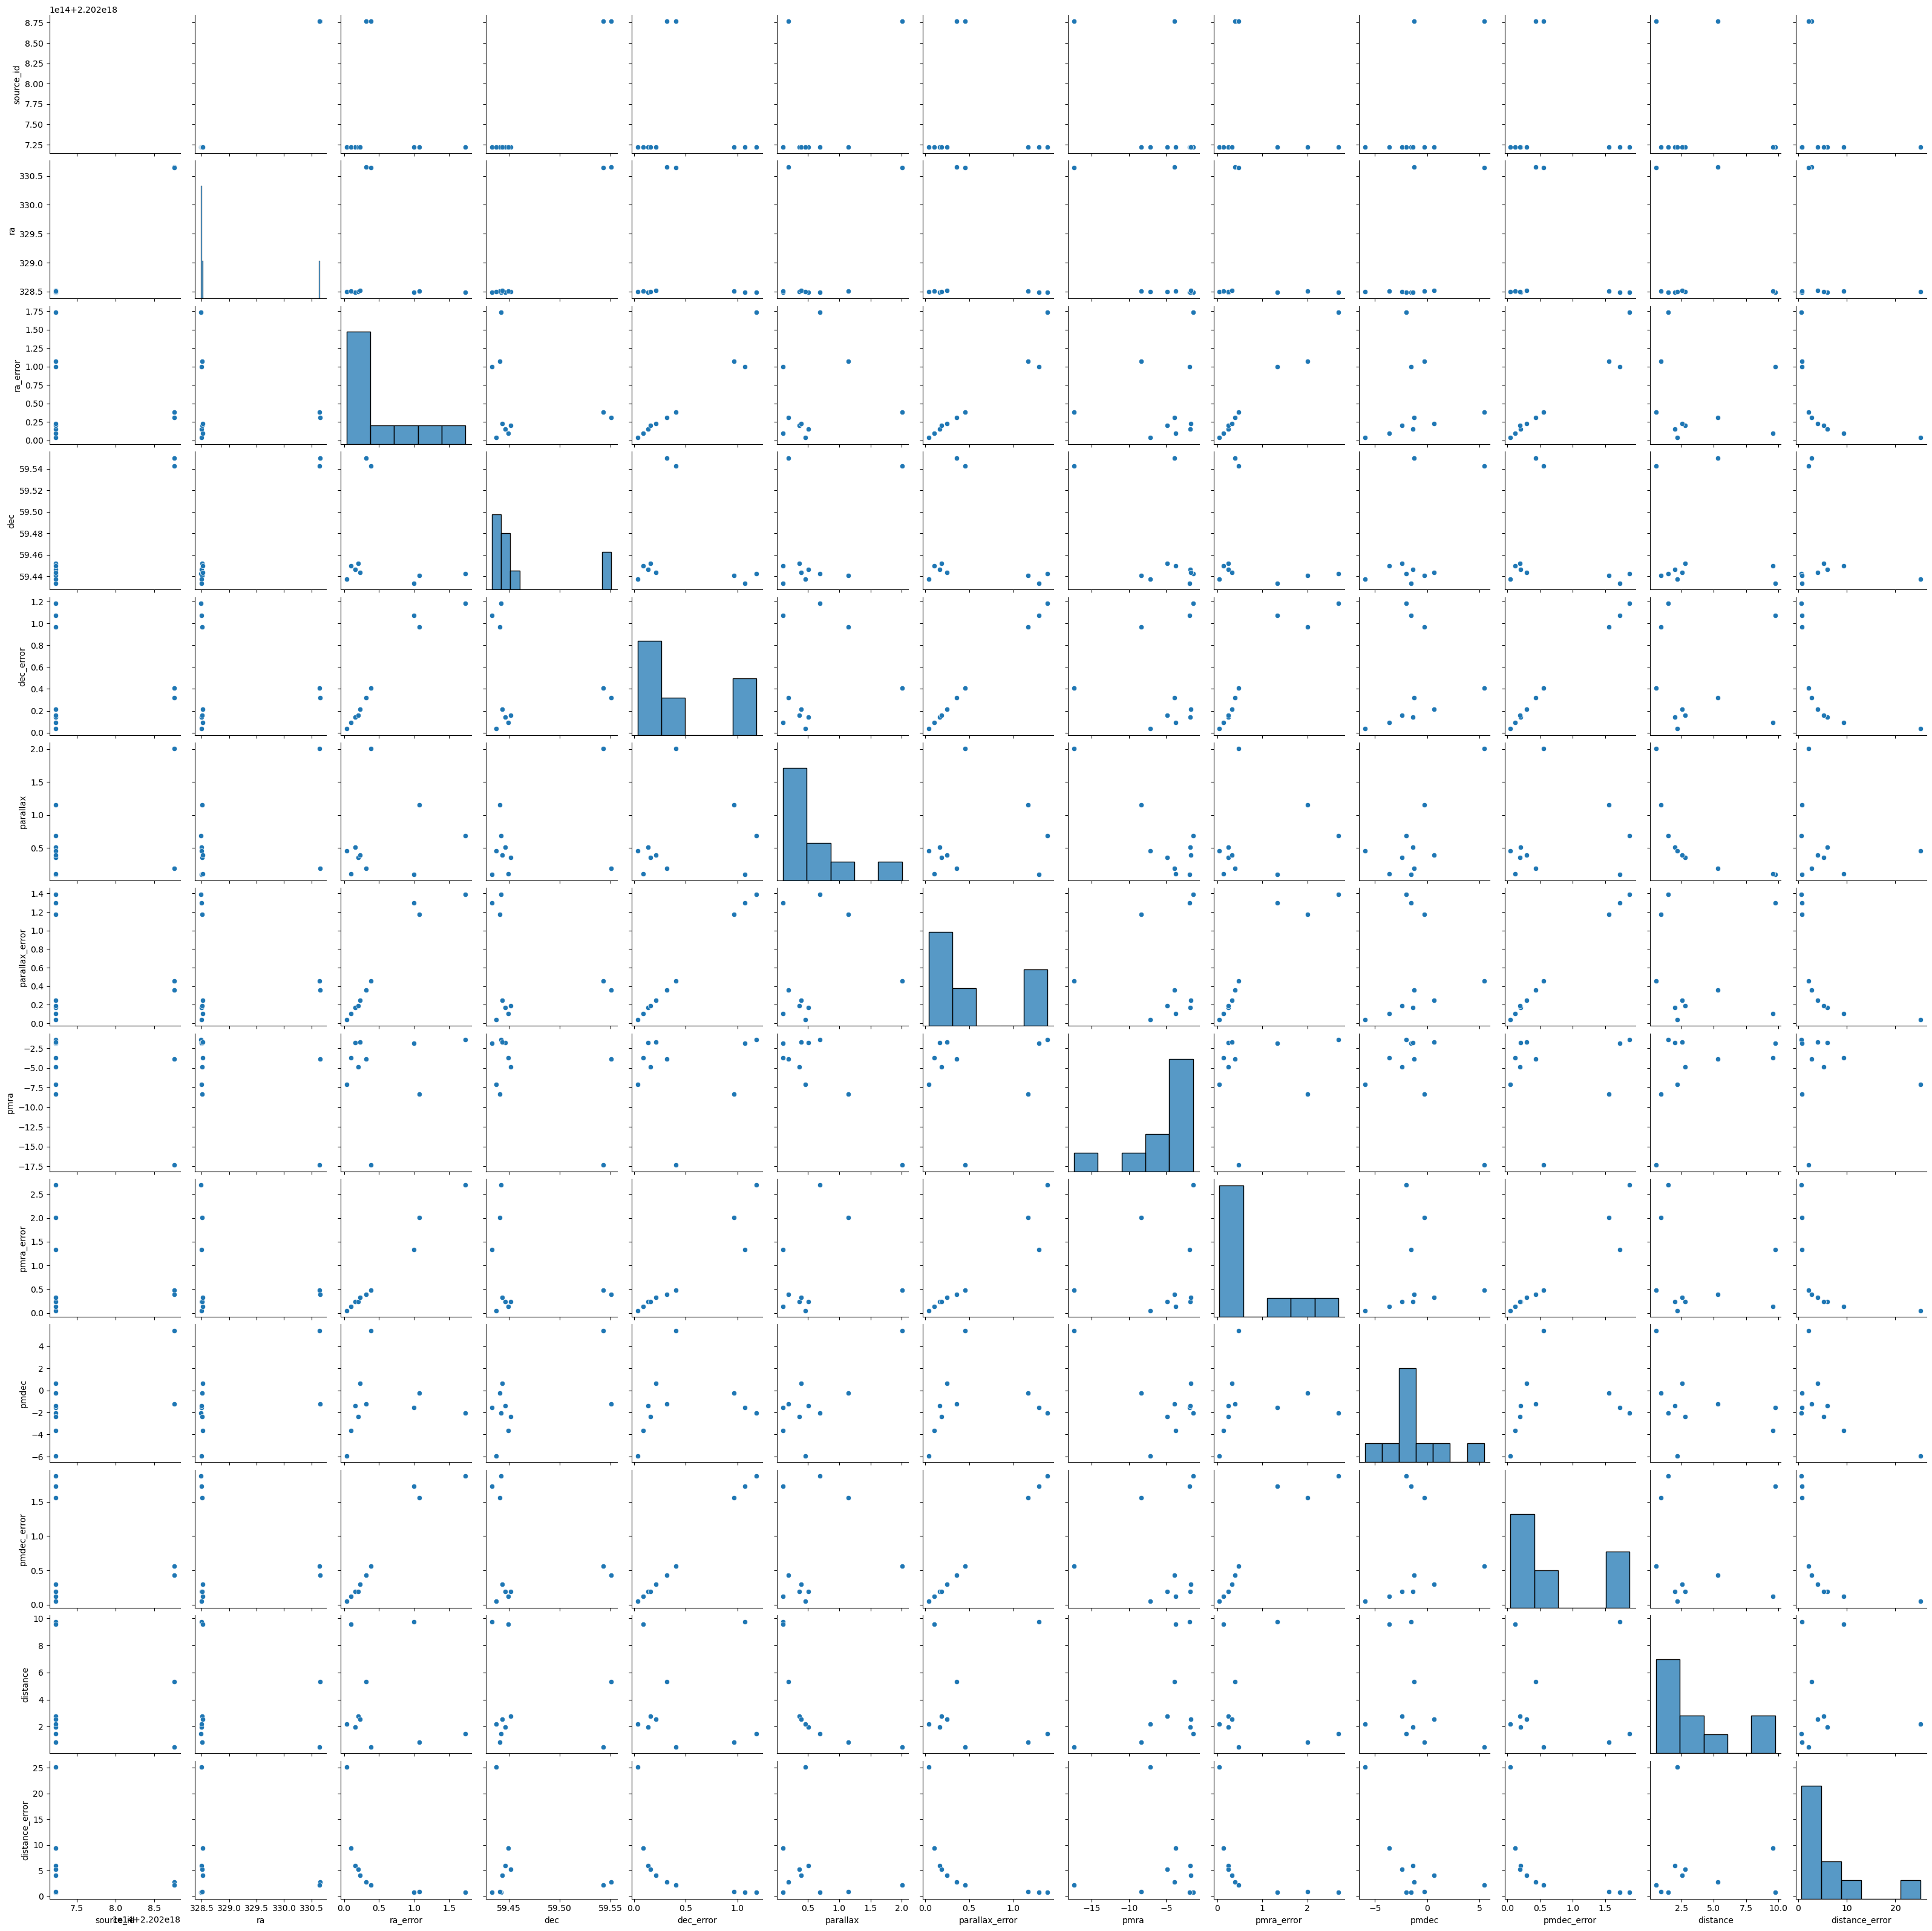

In [8]:
# Extra: for fun
# pair Ploting 
sns.pairplot(results[0:].to_pandas())
plt.show()

---

### Links used to understand the library:
1- https://gaia.aip.de/metadata/gaiadr3/gaia_source/

2- https://www.cosmos.esa.int/web/gaia-users/archive/writing-queries

3- https://astroquery.readthedocs.io/en/latest/